In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)

In [6]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
df[df.target == 1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [9]:
df["flower_name"] = df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
df0 = df[df.target == 0]
df1 = df[df.target == 1]
df2 = df[df.target == 2]

In [12]:
df2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
100,6.3,3.3,6.0,2.5,2,virginica
101,5.8,2.7,5.1,1.9,2,virginica
102,7.1,3.0,5.9,2.1,2,virginica
103,6.3,2.9,5.6,1.8,2,virginica
104,6.5,3.0,5.8,2.2,2,virginica


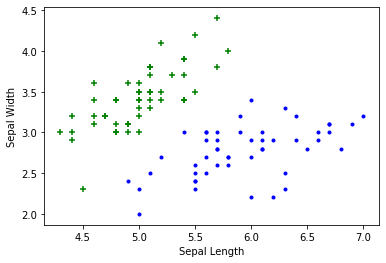

In [13]:
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color = 'green', marker = '+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color = 'blue', marker = '.')
#plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'], color = 'red', marker = '*')

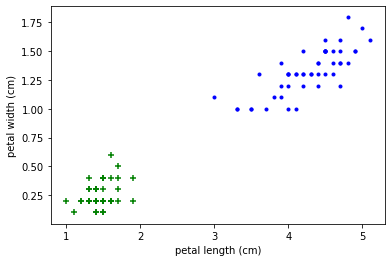

In [14]:
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color = 'green', marker = '+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color = 'blue', marker = '.')

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X = df.drop(['target','flower_name' ], axis = 1)
y =df.target

In [17]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)

In [19]:
print(len(X_train))
len(X_test)

120


30

In [20]:
from sklearn.svm import SVC
model = SVC()

In [21]:
model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [22]:
model.score(X_test, y_test)

0.9

#### We can see here increasing C value i:e the Regularization will decrease the score

In [23]:
model1 = SVC(C= 25)
model1.fit(X_train, y_train)

SVC(C=25, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [24]:
model1.score(X_test, y_test)

0.9666666666666667

In [25]:
# Lets change the gamma value and see how our model is behaving
model2 = SVC(gamma = 1)
model2.fit(X_train, y_train)
model2.score(X_test, y_test)

0.9666666666666667

In [26]:
model3 = SVC(gamma = 100)
model3.fit(X_train, y_train)
model3.score(X_test, y_test)

0.5333333333333333

### Experimenting on Digits Data set.

In [28]:
from sklearn.datasets import load_digits
digits = load_digits()

In [29]:
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

In [34]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [35]:
df =pd.DataFrame(digits.data)
df['target'] = digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [39]:
X = df.drop(['target'], axis = 1)
y = df.target

In [41]:
len(y)

1797

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [45]:
print(len(X_test))
len(X_train)

360


1437

In [47]:
rbf_model = SVC(kernel = 'rbf')
rbf_model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [48]:
rbf_model.score(X_test, y_test)

0.975

In [50]:
linear_model = SVC(kernel = 'linear')
linear_model.fit(X_test, y_test)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [51]:
linear_model.score(X_test, y_test)

1.0